In [25]:
import pandas as pd

# Load the Excel file
file_path = 'TOP500_201711.xls'  # Update the path if necessary
top500_data = pd.read_excel(file_path)

# Get distinct values from the 'Continent' column
distinct_continents = top500_data['Continent'].dropna().unique()

# Print the distinct values
print("Distinct values in the 'Continent' column:")
for continent in distinct_continents:
    print(continent)


Distinct values in the 'Continent' column:
Asia
Europe
Americas
Oceania
Africa


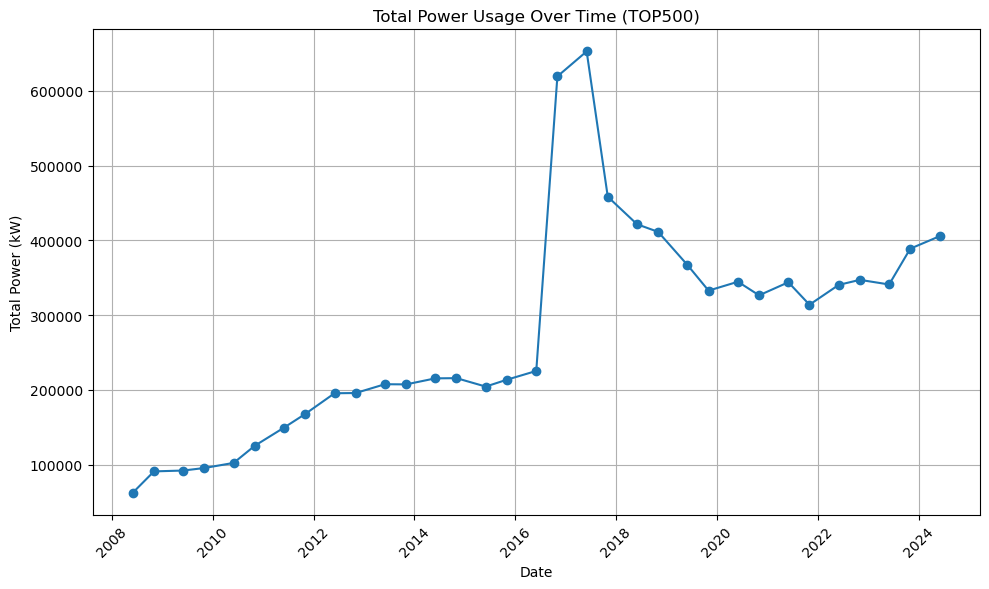

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Initialize lists to store dates and total power values
dates = []
total_power_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values
        if power_column in data.columns:
            total_power = data[power_column].sum()
            dates.append(date)
            total_power_values.append(total_power)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, total_power_values, marker='o')
plt.title('Total Power Usage Over Time (TOP500)')
plt.xlabel('Date')
plt.ylabel('Total Power (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import os
import re

# Dictionary to store filename and corresponding count of missing power values
missing_power_counts = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (for reference)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Count the number of missing values in the Power column
        if power_column in data.columns:
        
            missing_count = data[power_column].isna().sum()
            missing_power_counts[filename] = missing_count
        else:
            missing_power_counts[filename] = "Power column not found"

# Print the results
for filename, count in missing_power_counts.items():
    print(f"{filename}: {count} missing power values")


TOP500_200806.xls: 0 missing power values
TOP500_200811.xls: 0 missing power values
TOP500_200906.xls: 0 missing power values
TOP500_200911.xls: 0 missing power values
TOP500_201006.xls: 0 missing power values
TOP500_201011.xls: 0 missing power values
TOP500_201106.xls: 0 missing power values
TOP500_201111.xls: 217 missing power values
TOP500_201206.xls: 207 missing power values
TOP500_201211.xls: 214 missing power values
TOP500_201306.xls: 251 missing power values
TOP500_201311.xls: 244 missing power values
TOP500_201406.xls: 232 missing power values
TOP500_201411.xls: 242 missing power values
TOP500_201506.xls: 264 missing power values
TOP500_201511.xls: 259 missing power values
TOP500_201606.xls: 277 missing power values
TOP500_201611.xls: 65 missing power values
TOP500_201706.xls: 0 missing power values
TOP500_201711.xls: 195 missing power values
TOP500_201806.xls: 236 missing power values
TOP500_201811.xls: 265 missing power values
TOP500_201906.xls: 291 missing power values
TOP50

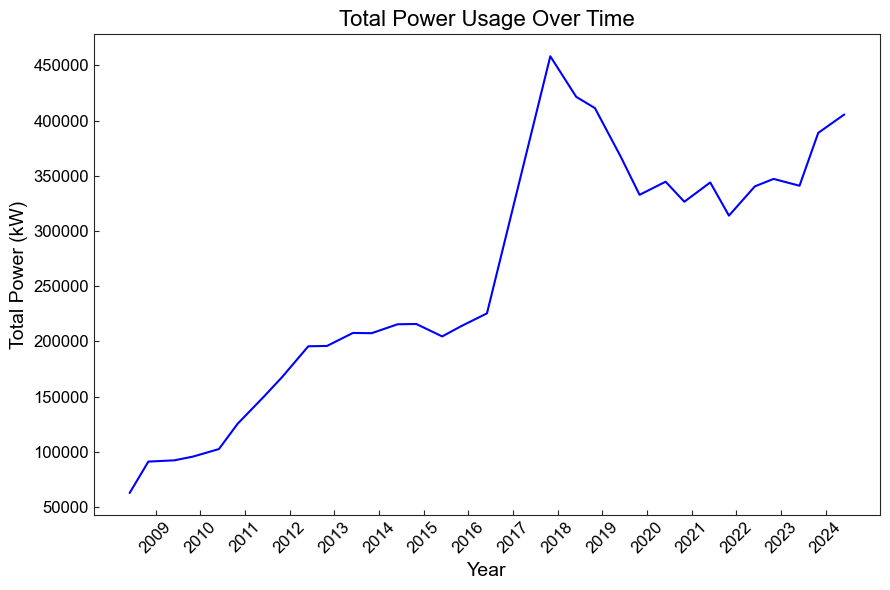

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Initialize lists to store dates and total power values
dates = []
total_power_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values
        if power_column in data.columns:
            total_power = data[power_column].sum()
            dates.append(date)
            total_power_values.append(total_power)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Plot the data
plt.figure(figsize=(9, 6))
plt.plot(dates, total_power_values, linestyle='-', color='b')
plt.title('Total Power Usage Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Power (kW)', fontsize=14, color='black')

# Set the x-axis to show every year with larger tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)
# Add grid lines
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save and show the plot
plt.tight_layout()
plt.savefig('totalPower.png')
plt.show()


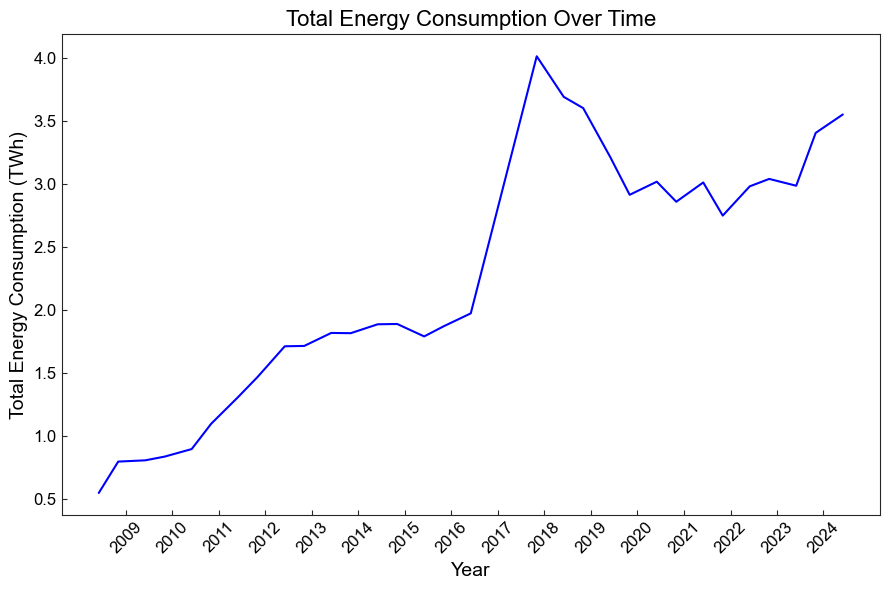

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Initialize lists to store dates and total energy values
dates = []
total_energy_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values and convert to energy (TWh)
        if power_column in data.columns:
            total_power = data[power_column].sum()
            total_energy = (total_power * 8760) / 1e9  # Convert to TWh
            dates.append(date)
            total_energy_values.append(total_energy)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Plot the data
plt.figure(figsize=(9, 6))
plt.plot(dates, total_energy_values, linestyle='-', color='b')
plt.title('Total Energy Consumption Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption (TWh)', fontsize=14, color='black')

# Set the x-axis to show every year with larger tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add grid lines
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save and show the plot
plt.tight_layout()
plt.savefig('totalEnergy_TWh.png')
plt.show()


In [27]:
# Group by 'Continent' and calculate the total power sum for each continent
continent_power_sum = top500_data.groupby('Continent')['Power (kW)'].sum()

# Print the total power sum for each continent
print("Total Power (kW) for each continent:")
for continent, total_power in continent_power_sum.items():
    print(f"{continent}: {total_power} kW")

Total Power (kW) for each continent:
Africa: 685.0 kW
Americas: 162225.79 kW
Asia: 214308.77 kW
Europe: 79968.99 kW
Oceania: 1179.05 kW


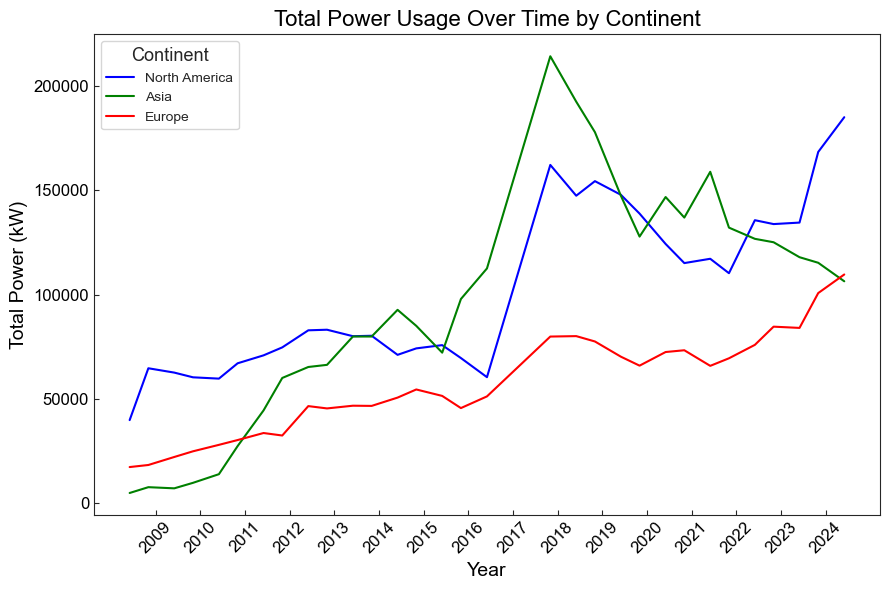

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Dictionary to store total power values by year and continent
data_by_continent = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = int(year_month[:4])
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if year > 2016 or (year == 2016 and int(month) > 11) else "Power"
        
        # Group by continent and sum power values for each continent
        if power_column in data.columns:
            continent_power = data.groupby('Continent')[power_column].sum()
            
            # Add data to the dictionary
            for continent, total_power in continent_power.items():
                # Skip "South America" and "Americas"
                if continent in ["South America"]:
                    continue
                if continent in ["Oceania"]:
                    continue
                if continent in ["Africa"]:
                    continue
                # Combine "Americas" with "North America"
                if continent == "Americas":
                    continent = "North America"
                
                if continent not in data_by_continent:
                    data_by_continent[continent] = {'dates': [], 'total_power': []}
                data_by_continent[continent]['dates'].append(pd.Timestamp(year, int(month), 1))
                data_by_continent[continent]['total_power'].append(total_power)

# Plotting
plt.figure(figsize=(9, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define a color palette for continents
for idx, (continent, data) in enumerate(data_by_continent.items()):
    plt.plot(data['dates'], data['total_power'], linestyle='-', color=colors[idx % len(colors)], label=continent)

plt.title('Total Power Usage Over Time by Continent', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Power (kW)', fontsize=14, color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Set x-axis to show every year
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)
# Add grid lines and legend
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Continent", fontsize=10, title_fontsize='13', loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('totalPowerByContinent.png')
plt.show()


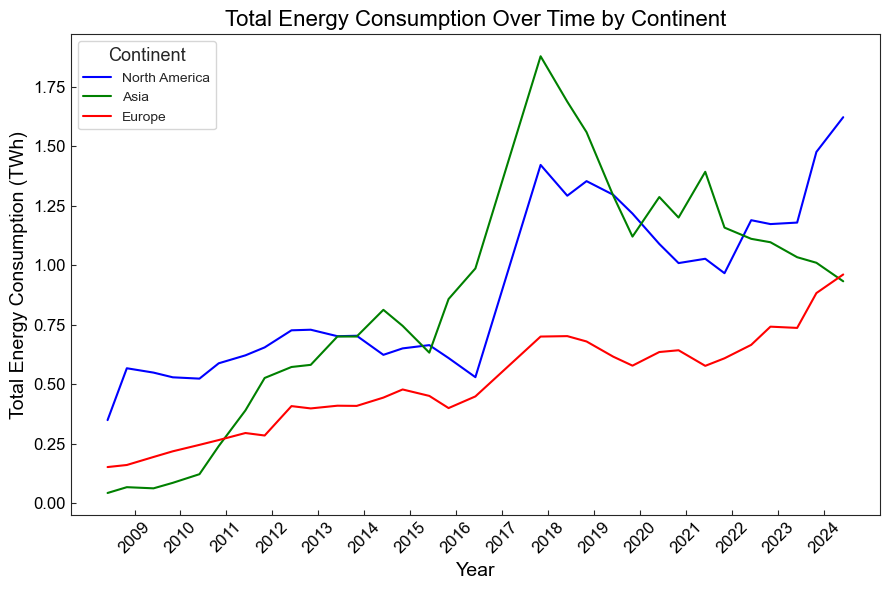

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Dictionary to store total energy values by year and continent
data_by_continent = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = int(year_month[:4])
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if year > 2016 or (year == 2016 and int(month) > 11) else "Power"
        
        # Group by continent and sum power values for each continent
        if power_column in data.columns:
            continent_power = data.groupby('Continent')[power_column].sum()
            
            # Add data to the dictionary
            for continent, total_power in continent_power.items():
                # Skip "South America", "Oceania", and "Africa"
                if continent in ["South America", "Oceania", "Africa"]:
                    continue
                # Combine "Americas" with "North America"
                if continent == "Americas":
                    continent = "North America"
                
                # Convert power to energy (TWh)
                total_energy = (total_power * 8760) / 1e9  # Convert to TWh
                
                if continent not in data_by_continent:
                    data_by_continent[continent] = {'dates': [], 'total_energy': []}
                data_by_continent[continent]['dates'].append(pd.Timestamp(year, int(month), 1))
                data_by_continent[continent]['total_energy'].append(total_energy)

# Plotting
plt.figure(figsize=(9, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define a color palette for continents
for idx, (continent, data) in enumerate(data_by_continent.items()):
    plt.plot(data['dates'], data['total_energy'], linestyle='-', color=colors[idx % len(colors)], label=continent)

plt.title('Total Energy Consumption Over Time by Continent', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption (TWh)', fontsize=14, color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Set x-axis to show every year
all_dates = [date for data in data_by_continent.values() for date in data['dates']]
plt.xticks(pd.date_range(start=min(all_dates), end=max(all_dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add grid lines and legend
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Continent", fontsize=10, title_fontsize='13', loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('totalEnergyByContinent_TWh.png')
plt.show()


In [17]:
# Find the data point for November 2018 in Asia
target_date = pd.Timestamp(2018, 11, 1)  # November 2018
continent = 'Asia'

if continent in data_by_continent:
    try:
        # Find the index of the target date
        index = data_by_continent[continent]['dates'].index(target_date)
        # Retrieve the corresponding total power
        total_power = data_by_continent[continent]['total_power'][index]
        print(f"Total power for {continent} in {target_date.strftime('%B %Y')}: {total_power} kW")
    except ValueError:
        print(f"{continent} does not have data for {target_date.strftime('%B %Y')}.")
else:
    print(f"No data available for {continent}.")


KeyError: 'total_power'